# Thompson Sampling
Probabalistic model that creates virtual samples from the original data continually adjusts the probability of each sample to reflect the current distribution of the data

## Import Libraries

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Import Dataset

In [8]:
dataset = pd.read_csv("datasets/ads.csv")
X = dataset.iloc[:].values

## Create Model

In [9]:
import random

N = len(X)
d = len(X[0])

ads_selected = []
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
total_reward = 0

for n in range(N):

    ad = 0
    max_random = 0

    for i in range(d):
        random_beta = random.betavariate(number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i

    ads_selected.append(ad)

    reward = X[n, ad]
    if reward == 1: number_of_rewards_1[ad] += 1
    else: number_of_rewards_0[ad] += 1

    total_reward += reward

## Visualize Results

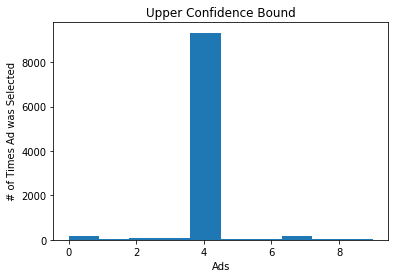

In [10]:
plt.hist(ads_selected)

plt.title("Upper Confidence Bound")
plt.xlabel("Ads")
plt.ylabel("# of Times Ad was Selected")

plt.show()